## 넘파이의 자료형

- 넘파이의 배열 (narray) 클래스는 원소가 모두 같은 자료형이어야 한다.
- array 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 dtype 인수를 사용한다.
- 만약 dtype 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다. 
- 만들어진 배열의 자료형을 알아내려면 dtype 속성을 보면된다.

In [1]:
import numpy as np

In [2]:
x = np.array([1,2,3])
x.dtype

dtype('int64')

In [3]:
x = np.array([1.0,2.0,3.0])
x.dtype

dtype('float64')

In [4]:
x = np.array([1,2,3.0])
x.dtype

dtype('float64')

- dtype 인수로 지정할 자료형은 다음 표에 보인 것과 같은 'dtype'로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자수를 의미
- 예를 들어 f8은 8바이트(64비트) 부동소수점 실수를 뜻하고 U4는 4글자 유니코드 문자열을 뜻한다. 
- 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.

In [5]:
x = np.array([1,2,3],dtype = 'f')
x.dtype

dtype('float32')

In [6]:
x[0]+x[1]

3.0

In [7]:
x = np.array([1,2,3],dtype = 'U')
x.dtype

dtype('<U1')

In [8]:
x[0] + x[1]

'12'

## Inf와 NaN

- 넘파이에서는 무한대를 표현하기 위한 np.inf와 정의할 수 없는 숫자를 나타내는 np.nan을 사용할 수 있다. 
- 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 np.inf이 나온다. 
- 0을 0으로 나누려고 시도하면 np.nan이 나온다.

In [9]:
np.array([0,1,-1,0])/np.array([1,0,0,0])

/var/folders/n_/n7h63p7n0p94s4q0cjjkgtl40000gn/T/ipykernel_3391/1727448928.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.array([0,1,-1,0])/np.array([1,0,0,0])
/var/folders/n_/n7h63p7n0p94s4q0cjjkgtl40000gn/T/ipykernel_3391/1727448928.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.array([0,1,-1,0])/np.array([1,0,0,0])


array([  0.,  inf, -inf,  nan])

In [10]:
np.log(0)

/var/folders/n_/n7h63p7n0p94s4q0cjjkgtl40000gn/T/ipykernel_3391/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [11]:
np.exp(-np.inf)

0.0

## 배열 생성
- Numpy는 몇가지 단순한 배열을 생성하는 명령을 제공한다.
- zeros, ones
- zeros_like, ones_like
- empty
- arange
- linspace, logspace

In [12]:
# 크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 zeros 명령을 사용한다. 인수로는 배열을 크기를 뜻하는 정수를 넣는다. 
a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

In [13]:
# 크기를 뜻하는 튜플을 입력하면 다차원 배열도 만들 수 있다. 
b = np.zeros((2,3))
b

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
# array 명령과 마찬가지로 dtype 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다.
c = np.zeros((5,2),dtype = 'i')
c

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

In [15]:
# 문자열 배열도 가능하지만 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다. 
d = np.zeros(5, dtype = "U4")
d

array(['', '', '', '', ''], dtype='<U4')

In [16]:
d[0] = 'abc'
d[1] = 'abcd'
d[2] = 'ABCDE'
d

array(['abc', 'abcd', 'ABCD', '', ''], dtype='<U4')

In [17]:
# 0이 아닌 1로 초기화된 배열을 생성하려면 ones 명령을 사용한다. 
e = np.ones((2,3,4),dtype = "i8")
e

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

In [18]:
# 만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면 ones_like, zeros_like 명령을 사용한다. 
f = np.ones_like(b,dtype='f')
f

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [19]:
# 배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다.
# 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 empty 명령을 사용할 수 있다. 
# empty 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.
g = np.empty((4,3))
g

array([[0.00000000e+000, 1.00937611e-320, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 4.47032019e-038],
       [6.50817334e-091, 6.75217017e-067, 6.58892591e-043],
       [8.84736853e+165, 3.99910963e+252, 1.46030983e-319]])

In [20]:
# arange 명령은 Numpy 버전의 range 명령이라고 볼 수 있다. 특정한 규칙에 따라 증가하는 수열을 만든다.
print(np.arange(10))
print(np.arange(3,21,2)) # 시작, 끝(포함하지 않음), 단계

[0 1 2 3 4 5 6 7 8 9]
[ 3  5  7  9 11 13 15 17 19]


In [21]:
# linspace 명령이나 logspace 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.
print(np.linspace(0,100,5)) # 시작, 끝(포함), 개수
print(np.logspace(0.1,1,10))

[  0.  25.  50.  75. 100.]
[ 1.25892541  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171
  5.01187234  6.30957344  7.94328235 10.        ]


## 전치 연산

- 2차원 배열의 전치 연산은 행과 열을 바꾸는 작업이다. 이는 배열의 T 속성으로 구할 수 있다. 
- 메서드가 아닌 속성이라는 점에 유의한다.

In [22]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## 배열의 크기 변형

- 만들어진 배열의 내부 데이터를 보존한 채로 형태만 바꾸려면 reshape명령이나 메서드를 사용
- ex) 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있음

In [24]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
a = a.reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### reshape
- reshape 명령의 형태 튜플의 원소 중 하나는 -1 이라는 숫자로 대체할 수 있음
- -1을 넣으면 해당 숫자는 다른 값에서 계산되어 사용됨
    - reshape()의 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로부터 추정"이 된다는 뜻

In [26]:
a = a.reshape(3,-1)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a = a.reshape(2,-1)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [28]:
a = a.reshape(2,3,-1)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

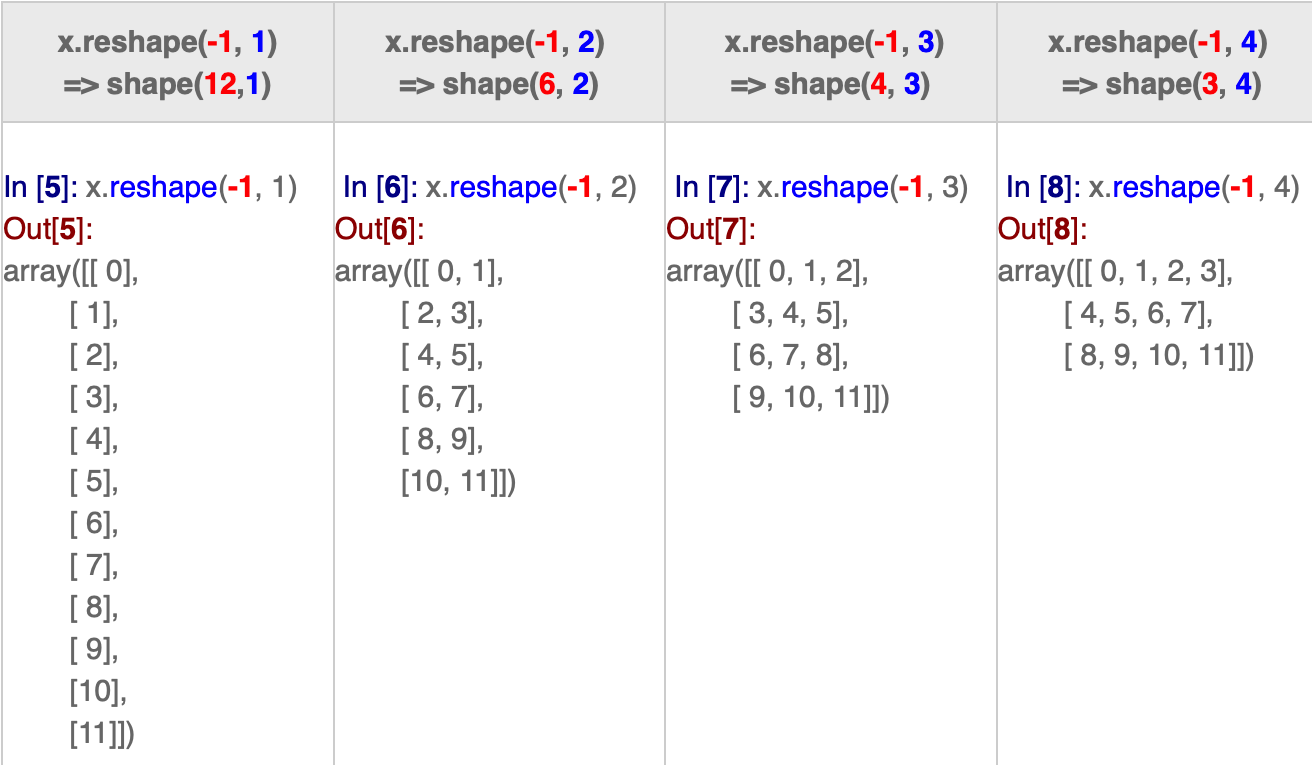
- 12개의 원소가 들어있는 배열 x에 대해서 x.reshape(-1,정수)를 해주면 '열(column)'차원의 '정수'에 따라서 12개의 원소가 빠짐없이 배치될 수 있도록 '-1'이 들어가 있는 '행(row)'의 개수가 가변적으로 정해진다.

### flatten & ravel 

- 다차원 -> 1차원으로 만들 때 사용하는 메서드

In [29]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [30]:
a = a.flatten()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [31]:
a = a.ravel()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### 주의할 점
- 길이가 5인 1차원 배열과 행, 열의 갯수가 (5,1)인 2차원 배열 또는 행, 열의 갯수가 (1,5)인 2차원 배열은 데이터가 같아도 엄연히 다른 객체라는 점

In [32]:
a1 = np.arange(6)
print('1. 길이가 5인 1차원 배열 : ',a1)

a2 = a1.reshape(1,6)
print('2. 행, 열의 갯수가 (5,1)인 2차원 배열 : ',a2)

a3 = a1.reshape(6,1)
print('3. 행, 열의 갯수가 (1,5) : \n',a3)

1. 길이가 5인 1차원 배열 :  [0 1 2 3 4 5]
2. 행, 열의 갯수가 (5,1)인 2차원 배열 :  [[0 1 2 3 4 5]]
3. 행, 열의 갯수가 (1,5) : 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


### newaxis

- 같은 배열에 대해 차원만 1차원 증가시키는 경우 사용

In [33]:
print('---a1---')
print(a1)
print("a1형태:",a1.shape)

print('---a2---')
a2 = a1[:, np.newaxis]
print(a2)
print("a2형태:",a2.shape)

---a1---
[0 1 2 3 4 5]
a1형태: (6,)
---a2---
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
a2형태: (6, 1)


In [34]:
print('---a1---')
print(a1)
print("a1형태:",a1.shape)

print('---a3---')
a3 = a1[np.newaxis,:]
print(a3)
print("a3형태:",a3.shape)

---a1---
[0 1 2 3 4 5]
a1형태: (6,)
---a3---
[[0 1 2 3 4 5]]
a3형태: (1, 6)


In [35]:
print('---a3---')
print(a3)
print("a3형태:",a3.shape)


a3 = a3.reshape(2,-1)
print(a3)
print("a3형태:",a3.shape)

print('---a4---')
a4 = a3[:,np.newaxis]
print(a4)
print("a4형태:",a4.shape) # (차원, 행, 열)

---a3---
[[0 1 2 3 4 5]]
a3형태: (1, 6)
[[0 1 2]
 [3 4 5]]
a3형태: (2, 3)
---a4---
[[[0 1 2]]

 [[3 4 5]]]
a4형태: (2, 1, 3)


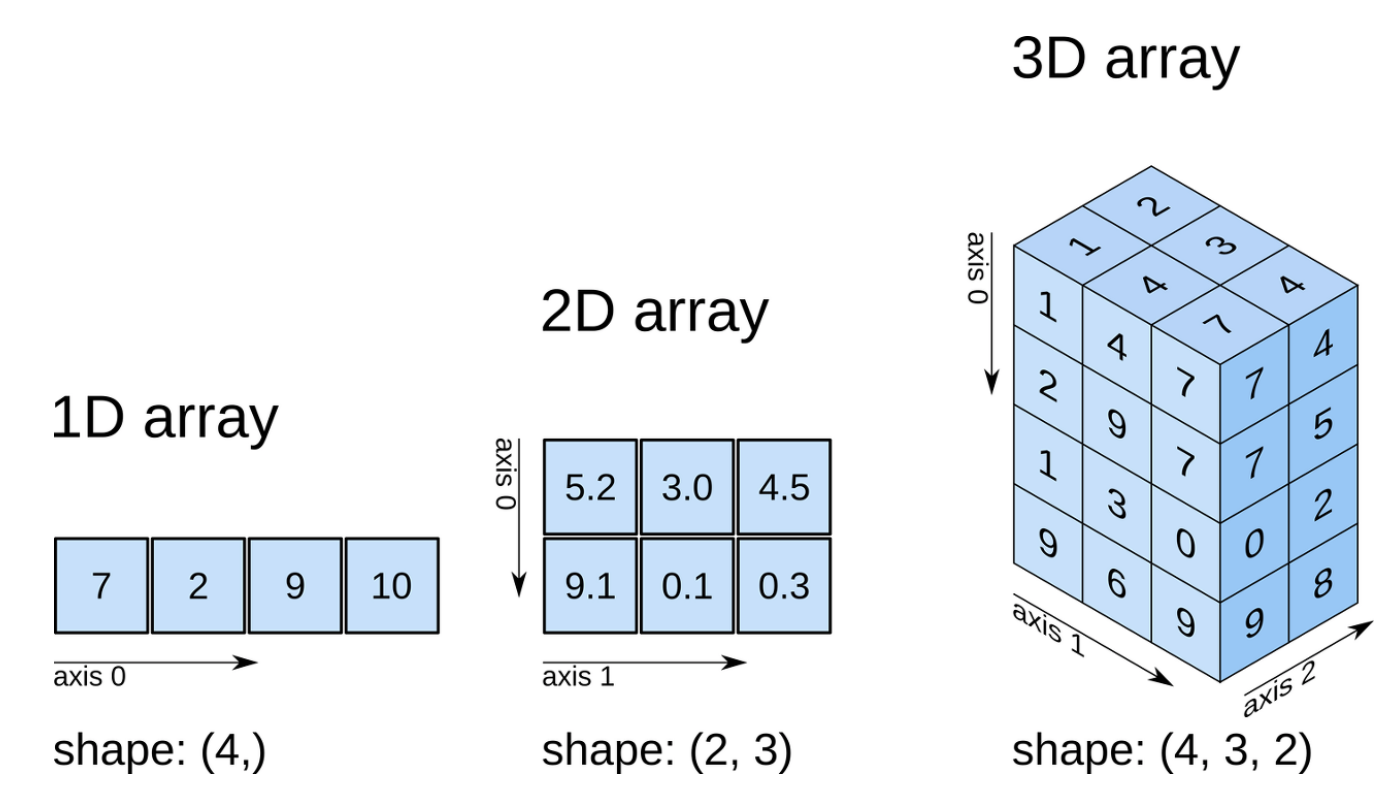


- 3차원인 경우 shape: (차원, 행, 열)

### reshape vs newaxis ?
 
- reshape는 변환전 차원의 합과 변환후 차원의 합이 같아야 합니다.
 
- (4,1)을 변환한다는 기준으로 (2,2)는 reshape 가능한데 (4,1)을 (3,3)으로 바꿀 수는 없음!
 
* 4개의 원소를 2by2로 재배열 -> reshape

## 배열 연결

행의 수, 열의 수가 같은 두 개 이상의 배열을 연결해서 더 큰 배열을 만들 때 


- np.hstack() 
- np.vstack()
- np.dstack()
- np.stack()
- np.r_()
- np.c_()
- np.tile()

위와 같은 메서드를 사용한다.

### np.hstack( ) 
> 하나의 리스트에 담긴, 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 많은 배열을 만든다. 

In [36]:
a1 = np.ones((2, 3))
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [37]:
a2 = np.zeros((2, 2))
a2

array([[0., 0.],
       [0., 0.]])

In [38]:
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

### np.vstack( )
> 하나의 리스트에 담긴, 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 많은 배열을 만든다.

In [39]:
b1 = np.ones((2, 3))
b1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [40]:
b2 = np.zeros((3, 3))
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [41]:
np.vstack([b1,b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### np.dstack( )
> 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다. 가장 안쪽의 원소의 차원이 증가한다. 즉 가장 내부의 숫자 원소가 배열이 된다.

In [42]:
c1 = np.ones((3, 4))
c1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [43]:
c2 = np.zeros((3, 4))
c2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [44]:
c3 = np.dstack([c1,c2])
print(c3)
print()
print('c3의 형태:',c3.shape)

[[[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]]

c3의 형태: (3, 4, 2)


### np.stack( )
> dstack의 기능을 확장한 것으로 dstack처럼 마지막 차원으로 연결하는 것이 아니라 사용자가 지정한 차원(축으로) 배열을 연결한다. axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다.

In [45]:
print(c1)
print()
print(c2)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [46]:
# axis = 0 이므로 가장 바깥에 값이 2인 차원이 추가된다. 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (2 x 3 x 4)
c = np.stack([c1, c2])
print(c)
print()
print(c.shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]

(2, 3, 4)


In [47]:
# axis = 1이면 두번째 차원으로 새로운 차원이 삽입된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 2 x 4) 
c = np.stack([c1, c2], axis=1)
print(c)
print()
print(c.shape)

[[[1. 1. 1. 1.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [0. 0. 0. 0.]]]

(3, 2, 4)


### np.r_( )
> 배열 좌우 연결(hstack 명령과 비슷), 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, [])를 사용, 이런 특수 메서드를 인덱서(indexer)라고 한다.

In [48]:
d = np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]
print(d)
print(d.shape)

[1 2 3 4 5 6]
(6,)


### np.c_( )
>  배열 차원 증가, 좌우로 연결, 만약 1차원 배열을 연결하면 2차원 배열이 된다.

In [49]:
d2 = np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]
print(d2)
print(d2.shape)

[[1 4]
 [2 5]
 [3 6]]
(3, 2)


### np.tile(배열, x )
> 동일한 배열을 x 만큼 반복하여 연결

In [50]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [51]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

## 연습문제
지금까지 공부한 명령어를 사용하여 다음과 같은 배열을 만들어라.

```python 
array([[   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.]])
```

In [52]:
a1 = np.r_[np.zeros(3),np.ones(2)]
a2 = np.arange(10,160,10,dtype = 'f').reshape(3,-1)
a3 = np.tile(a1, (3, 1))
res = np.r_[a3,a2]

print(np.tile(res, (2, 1)))

[[  0.   0.   0.   1.   1.]
 [  0.   0.   0.   1.   1.]
 [  0.   0.   0.   1.   1.]
 [ 10.  20.  30.  40.  50.]
 [ 60.  70.  80.  90. 100.]
 [110. 120. 130. 140. 150.]
 [  0.   0.   0.   1.   1.]
 [  0.   0.   0.   1.   1.]
 [  0.   0.   0.   1.   1.]
 [ 10.  20.  30.  40.  50.]
 [ 60.  70.  80.  90. 100.]
 [110. 120. 130. 140. 150.]]


참고)

https://datascienceschool.net/01%20python/03.02%20배열의%20생성과%20변형.html#id6